In [1]:
import pandas as pd
import numpy as np
import pickle
# work with the reduced graph
data = pd.read_csv('wikigraph_reduced.csv', delim_whitespace=True)
data.columns=['edge_a','edge_b']

In [2]:
# work with the complete graph
def big_data():
    array=[]
    listassa=[]
    file3 = open('wiki-topcats.txt','r')
    Lines = file3.readlines() 
    for line in Lines: 
        array=line.strip().split(' ',maxsplit=1)
        array=list(map(int,array))
        listassa.append(array)
    data=pd.DataFrame(listassa)
    data.columns=['edge_a','edge_b']
    return(data)

In [3]:
#data=big_data()

    Here first we clear the data readed from a txt file and organize it in a dataframe.

In [4]:
array=[]
listassa=[]
file1 = open('wiki-topcats-page-names.txt','r')
Lines = file1.readlines() 
for line in Lines: 
    array=line.strip().split(' ',maxsplit=1)
    listassa.append(array)
article_names=pd.DataFrame(listassa)
article_names.columns=['Number','Article']

In [5]:
article_names

,Number,Article
0,0,Chiasmal syndrome
1,1,Kleroterion
2,2,Pinakion
3,3,LyndonHochschildSerre spectral sequence
4,4,Zariski's main theorem
...,...,...
1791484,1791484,Noadiah Russell (Yale founder)
1791485,1791485,Cornus officinalis
1791486,1791486,Peter Grummitt
1791487,1791487,Baron Estcourt


    In this second part, the same process of cleaning and organization is done.

In [6]:
array=[]
listassa=[]
file2 = open('wiki-topcats-categories.txt','r')
Lines = file2.readlines() 
for line in Lines: 
    array=line.strip()
    array=array.replace('Category:','') .split(';')
    array[0]=array[0].replace('_',' ')
    listassa.append(array)
category_set=pd.DataFrame(listassa)
category_set.columns=['Category','Articles']

In [7]:
category_set

,Category,Articles
0,Buprestoidea,301 302 303 304 305 306 307 308 309 310 311 3...
1,People from Worcester,1056 1057 1058 1059 1060 60971 76515 76871 78...
2,Skin conditions resulting from physical factors,971 973 1166 1167 1168 1169 1170 1171 1172 11...
3,Visual kei bands,1297 1300 1311 1312 1313 1314 1315 1316 1319 ...
4,Japanese rock music groups,1297 1300 1313 1314 1315 1316 1319 1320 1322 ...
...,...,...
17359,British science fiction novels,16110 24545 39814 67923 108629 108630 108631 ...
17360,Television soundtracks,1117 110192 110376 110377 110380 110395 13700...
17361,Diptera of North America,279 280 283 31110 31129 31133 31138 31139 311...
17362,Diptera of Asia,279 31129 31133 31134 31135 31136 31137 31138...


    Now using the libraries networkx and matplotlib we start creating the graph

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
G = nx.Graph()

    Here we define the name of the article as an attribute of the node, so that we can access each article from the graph and still have an organized representation

In [9]:
labels = {}
k=len(article_names)
for i in range(0,k):
    labels[i]=article_names.Article[i]

    Plotting just a part of the graph to analyse with good visualization

In [10]:
G = nx.from_pandas_edgelist(data,'edge_a', 'edge_b', None, create_using=nx.DiGraph())

    Plot of the graph and setting the article name as an attribute of the node

In [11]:
#figure(figsize=(18, 8))
nx.set_node_attributes(G, labels, name='article')
#nx.draw(G, with_labels=True, node_size=100)

### RQ1
- Is the graph directed?

In [33]:
data.iloc[:,1]

796         1185516
909         1059989
910         1062426
911         1161925
1141         541222
             ...   
28511768    1060990
28511769    1061382
28511771    1110380
28511772      80740
28511785     235100
Name: edge_b, Length: 483094, dtype: int64

In [34]:
data1 = (data.iloc[:,1],data.iloc[:,0])

In [35]:
for i in range(len(data)):
    if data.iloc[i][0] == data.iloc[i][1]:
        print(data.iloc[i],'yes')
        break

edge_a    27676
edge_b    27676
Name: 534214, dtype: int64 yes


    The graph cointains loop

In [36]:
data1

(796         1185516
 909         1059989
 910         1062426
 911         1161925
 1141         541222
              ...   
 28511768    1060990
 28511769    1061382
 28511771    1110380
 28511772      80740
 28511785     235100
 Name: edge_b, Length: 483094, dtype: int64, 796              95
 909             108
 910             108
 911             108
 1141            134
              ...   
 28511768    1791481
 28511769    1791481
 28511771    1791481
 28511772    1791482
 28511785    1791484
 Name: edge_a, Length: 483094, dtype: int64)

In [37]:
data1 = data

In [38]:
prova = data.merge(data1, left_on='edge_a', right_on='edge_b')

In [39]:
for i in range(len(prova)):
    if prova.iloc[i][0] == prova.iloc[i][-1]:
        print(i,'yes')
        break

0 yes


In [40]:
prova1 = prova.iloc[36]
prova1

edge_a_x        153
edge_b_x    1085943
edge_a_y    1064807
edge_b_y        153
Name: 36, dtype: int64

In [41]:
l = list(prova1.unique())
col1 = data.loc[data['edge_a']== l[0]]
col2 = data.loc[data['edge_b']== l[0]]

In [42]:
col1

,edge_a,edge_b
1309,153,744272
1311,153,1064807
1312,153,1065282
1315,153,1085943
1316,153,1125916
1317,153,1130618
1318,153,1161083
1319,153,1162104
1320,153,1162238


In [43]:
col2

,edge_a,edge_b
11246100,744272,153
16524381,1064807,153
16546307,1065282,153
16911848,1085943,153
18362402,1162238,153


In [44]:
a = []
b = []
for i in range(len(col1)):
    a.append(col1.iloc[i,1])
for j in range(len(col2)):
    b.append(col2.iloc[j,0])

In [45]:
A = set(a)
B = set(b)
A.intersection(B)

{744272, 1064807, 1065282, 1085943, 1162238}

    The graph is oriented

In [46]:
if(nx.is_directed(G)):
    print("The graph is in fact directed!")
else:
    print("The graph is not directed!")

The graph is in fact directed!


- How many articles are we considering?

In [13]:
print("We are considering",len(article_names),"articles")

We are considering 1791489 articles


- How many hyperlinks between pages exist?

As the graph is a directed graph, so each edge is an independent hiperlink between two articles

In [14]:
print("There are",len(data), "hiperlinks between the articles")

There are 483094 hiperlinks between the articles


- Compute the average number of links in an arbitrary page.

In [15]:
d=round(len(data)/len(article_names),2)
print("The average number of links in an arbitrary page is", d)

The average number of links in an arbitrary page is 0.27


- What is the graph density?

In [16]:
D=2*len(data)/(len(article_names)*(len(article_names)-1))
print("The graph density is", round(D,5))

The graph density is 0.0


- Do you believe that the graph is dense or sparse? Is the graph dense?

In [17]:
print("As the following definition: 'The sparse graph is a graph whose density D is lower to 0,5 -and greater than 0, by definition-'.")
print("So, the graph is SPARSE")

As the following definition: 'The sparse graph is a graph whose density D is lower to 0,5 -and greater than 0, by definition-'.
So, the graph is SPARSE


- Visualize the nodes' degree distribution

In [18]:
degrees = dict(G.degree())
strut=[degrees.keys(),degrees.values()]
deg_dist=pd.DataFrame(strut)
deg_dist=deg_dist.T
deg_dist.columns=['Node','Degree']
deg_dist

,Node,Degree
0,95,1
1,1185516,9
2,108,3
3,1059989,47
4,1062426,43
...,...,...
98338,1790166,4
98339,1790616,4
98340,1791482,1
98341,1791484,1


In [19]:
dist=deg_dist.groupby(by='Degree').agg(['count'])
dist_=dist.head(20) #here we take the 20 first most important degree, regarding the number of nodes
dist_.reset_index()

,Degree,Node
,,count
0,1,23319
1,2,16814
2,3,6535
3,4,6842
4,5,4410
5,6,4201
6,7,3295
7,8,3180
8,9,2564


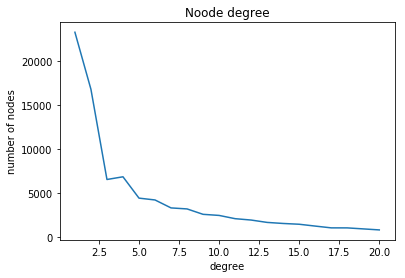

In [20]:
x=dist_.index
y=dist_['Node']['count'].tolist()

plt.title("Noode degree")
plt.plot(x, y)
plt.xlabel('degree')
plt.ylabel('number of nodes')
plt.show()

### RQ2
    Define a function that takes in input:
- A page SOURCE
- A number of clicks CLICK
- and returns the set of all pages that a user can reach within d clicks.

    This function test the distance for all the nodes and then give the result based on the number of clicks selected. As an output, we have a dataframe with the name of the articles and the number of the nodes.

In [21]:
def find_pages(G,source,click):
    node_number=[]
    nome_article=[]
    for node in G.nodes():
        try:
            comparative=nx.shortest_path_length(G, source=source,target=node)
        except nx.NetworkXNoPath:
            comparative=0
        if(comparative==click):
            node_number.append(node)
            nome_article.append(labels[node])
    pages_w_clicks=pd.DataFrame([node_number,nome_article])
    pages_w_clicks=pages_w_clicks.T
    pages_w_clicks.columns=['Node_Number','Article_Name']   
    return(pages_w_clicks)

    Here we call the fuction for an arbitrary node number (1150) and a arbitrary number of clicks (5)

In [24]:
##### G.nodes(1150)
from tqdm import tqdm
for i in tqdm(range(0, 100)):
    result=find_pages(G,1150,5)
    result

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [58:09<00:00, 34.89s/it]


# RQ3

Define a function that takes in input:

- A category C
- A set of pages in C, p = {p1, ..., pn}
- returns the minimum number of clicks required to reach all pages in p, starting from the page v, corresponding to the most central article, according to the in-degree centrality, in C.

### first remarks on the problem :

At the we first try to apply, for any given category C, a subgraph creating function that allows us to work on a subgraph of G that only contains articles from that category C.

The problem was that the nodes of the subgraph where empty. By using np.intersect1d() we understaood that articles in C were not in G. This means that articles in C are not connected.

With the following cell we saw that G contains only 98 343 artickes among the 1 791 489 articles from the 'wiki-topcats-page-names.txt' file.

In [25]:
print(data['edge_a'].nunique())
print(data['edge_b'].nunique())
len(G.nodes)

90920
75467


98343

So we first chose to filter categories that are not connected :

In [ ]:
#here we look for categories that contains articles in the G graph because as we saw just above, most of aricles are not in G.nodes
from tqdm import tqdm
for i in tqdm(range(0, 100)):
    cat=[]
    a=category_set['Category'].tolist()
    for i in range(len(a)):
        l=(category_set[category_set.Category==a[i]].Articles).tolist()[0].split()
        for j in range(len(l)):
            l[j]=int(l[j])
        if np.intersect1d(l,G.nodes).size>0:
            cat.append(a[i])

#then we save it in a .txt file
    with open("categories.txt", "wb") as fp:
        pickle.dump(cat, fp)

In [27]:
with open("categories.txt", "rb") as fp:
    cate=pickle.load(fp)

In [28]:
print(cate)

['People from Worcester', 'Eli Lilly and Company', 'Disability', 'American biologists', 'Molecular biologists', 'American geneticists', 'Nobel laureates in Physiology or Medicine', 'People from Winston-Salem, North Carolina', 'United States Air Force airmen', 'Strategic Air Command', 'Military history of the United States (19001999)', 'American World War II flying aces', 'Recipients of the Air Medal', 'Recipients of the Distinguished Flying Cross (United States)', 'American military personnel of the Vietnam War', 'Recipients of the Distinguished Service Medal (United States)', 'Recipients of the Legion of Merit', 'United States Air Force generals', 'United States Army Air Forces pilots of World War II', 'United States Army Air Forces officers', 'John F. Kennedy School of Government alumni', 'American military personnel from Wisconsin', 'United States Air Force officers', 'American aviators', 'American surgeons', 'Rebels', '19th-century Christian saints', 'Makerere University alumni', '

### Definition of in-degree centrality

We define in_degree centrality as the number of in-coming links, or the number of predecessor nodes, because we found that it also exists the out-degree centrality that is the number of out-going links, or the number of successor nodes.

In [29]:
def rq3(G, C):
    
    if C in cate:   #checking if C is a proper category as defined previously
        
        a=(category_set[category_set.Category==C].Articles).tolist()[0].split()
        for j in range(len(a)):
            a[j]=int(a[j])
        E=G.subgraph(a)   #creating the subgraph corresponding to the category C
        e=list(E.edges)
        n=list(E.nodes)
        
        if len(e)>0:
            #create a dictionnary that stores for each article in C the id of the article and the incomming edges
            dic={}
            for i in range(len(n)):
                dic[n[i]]=[]
            for i in range(len(e)):
                temp=e[i][1]
                if temp in dic.keys():
                    dic[e[i][1]].append(e[i][0])
            #print(dic)
            
            #computation of the in-degree centrality
            maxi=0
            article=0
            for i in dic.keys():
                if len(dic[i])>=maxi:
                    maxi=len(dic[i])
                    article=i
            
            "following part is just to make sure we are not falling in the computation of the in_degree_center of C"
            #test=nx.in_degree_centrality(H)
            #test={k: v for k, v in sorted(test.items(), key=lambda item: item[1])}
            #t=list(test.keys())[-1]
            #print(article, t)
            
            #counting the total number of clicks in "path" or print "Not possible" if the subgraph is not connected
            path=0
            temp=0
            for i in range(len(n)):
                if (n[i] in dic[article]):
                    path+=nx.shortest_path_length(E, source=n[i],target=article)
                elif n[i]!=article:
                    temp=1
                    break 
            if temp==1:
                sol='Not possible'
            else:
                sol=str(path)
        else:
            sol='Not possible'
    else:
        sol='Not possible'
    
    return sol

In [30]:
a=rq3(G,'American female soccer players')
a

'3'

Run over all categories in 'cate':

In [31]:
for i in range(len(cate)):
    a=rq3(G,cate[i])
    if a!='Not possible':
        print(cate[i] + ' ' +a)

Greek Orthodox Patriarchs of Alexandria 1
Mishnah rabbis 2
Egyptian saints 1
Continental philosophers 2
Popes of the Coptic Orthodox Church of Alexandria 1
People from Shizuoka Prefecture 2
People from Kanagawa Prefecture 1
Members of the Parliament of Norway 1
Spanish generals 2
Popes 1
Italian popes 1
Recipients of the Order of the White Eagle (Poland) 1
1st-century Romans 1
2nd-century Romans 1
2nd-century BC Romans 1
Recipients of the Cross of the Order of Merit of the Federal Republic of Germany 1
Irish Gaelic poets 1
Medieval Irish writers 1
Motagua players 1
Doges of Venice 1
New York Americans players 0
Montreal Canadiens players 1
Canadian ice hockey centres 0
Ice hockey people from Quebec 0
German-American history 1
North Carolina State Senators 1
Algonquian personal names 1
Women state legislators in Minnesota 1
Members of the Minnesota House of Representatives 2
Members of the Executive Council of New Brunswick 1
Tom and Jerry cartoons 1
Samurai 1
People in Meiji period Jap

### RQ3 -Try on an example that shoud work

In [32]:
gp=data.groupby(['edge_b'])
for j,D in gp:
    if j==1087:
        print(D)
        break

           edge_a  edge_b
6176         1088    1087
11236592   743828    1087
15166737  1028633    1087
16304007  1062055    1087
16392068  1062794    1087
16472633  1063918    1087
18330537  1161300    1087
18347147  1161782    1087


In [47]:
l=D['edge_a'].tolist()
l.append(1087)
E=G.subgraph(l)

In [48]:
print(E.nodes)
print(E.edges)

[1088, 1062055, 1062794, 1063918, 743828, 1161300, 1161782, 1028633, 1087]
[(1088, 1087), (1062055, 1087), (1062794, 1087), (1063918, 1087), (743828, 1087), (1161300, 1087), (1161782, 1087), (1028633, 1087), (1087, 1088), (1087, 743828), (1087, 1028633), (1087, 1062055), (1087, 1063918), (1087, 1161782)]


In [49]:
e=list(E.edges)
n=list(E.nodes)

print(len(e))
#create a dictionnary that stores for each article in a given category the id of the article and the incomming edges
dic={}
for i in range(len(n)):
    dic[n[i]]=[]
for i in range(len(e)):
    temp=e[i][1]
    if temp in dic.keys():
        dic[e[i][1]].append(e[i][0])

print(dic)

#computation of the in-degree centrality
maxi=0
article=0
for i in dic.keys():
    if len(dic[i])>maxi:
        maxi=len(dic[i])
        article=i

print(article)

14
{1088: [1087], 1062055: [1087], 1062794: [], 1063918: [1087], 743828: [1087], 1161300: [], 1161782: [1087], 1028633: [1087], 1087: [1088, 1062055, 1062794, 1063918, 743828, 1161300, 1161782, 1028633]}
1087


In [50]:
path=0
temp=0
for i in range(len(n)):
    if (n[i] in dic[article]):
        path+=nx.shortest_path_length(E, source=n[i],target=article)
    elif n[i]!=article:
        temp=1
        break 
if temp==1:
    sol='Not possible'
else:
    sol=str(path)
print(sol)

8


We can see that on an example we created where we ensured that it exists a node connected with all over nodes in the subgraph, the algorithm ran successfully.

### RQ4
Given in input two categories: C1 and C2, we get the subgraph induced by all the articles in the two categories.

Let v and u two arbitrary pages in the subgraph. What is the minimum set of hyperlinks one can remove to disconnect u and v?

    First, given an category, create the subgraph with the nodes of this category. The fuction SubG, is responsible to, given a category, output a subgraph of G with the articles of the category especified.

In [51]:
def SubG(G, C):
    
    if C in cate:   #checking if C is a proper category as defined previously
        
        a=(category_set[category_set.Category==C].Articles).tolist()[0].split()
        for j in range(len(a)):
            a[j]=int(a[j])
        E=G.subgraph(a)   #creating the subgraph corresponding to the category C
    return(E)

    Now, given two different categories, the function rq4 create a subgraph with the two categories and output it.

In [52]:
def rq4(a,b):
    S1=SubG(G,a)
    S2=SubG(G,b)
    Sub=nx.compose(S1,S2)
    return(Sub)

    Here, we decide to use the categories 'Romania international footballers' and 'Romanian footballers' to test the fuction and print the resulted graph.

In [53]:
#In this cell we define the two categories
cat_a='Romania international footballers'
cat_b='Romanian footballers'

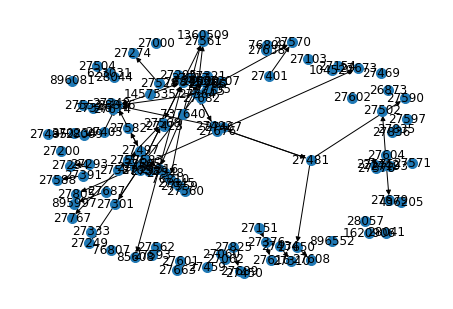

In [54]:
test=rq4(cat_a,cat_b)
nx.draw_spring(test, with_labels=True, node_size=100)

    With the graph, we first take a look over the degree of the nodes, to better choose an example to our algorithm.

In [55]:
test.in_degree()

InDegreeView({27650: 1, 88836: 7, 27653: 1, 1360509: 1, 27401: 0, 28041: 0, 76809: 1, 76810: 4, 76811: 7, 27663: 1, 27154: 1, 28057: 0, 27548: 0, 27676: 1, 27294: 1, 27295: 0, 27679: 1, 27553: 1, 27682: 0, 27300: 5, 27301: 1, 734630: 1, 27303: 3, 27560: 1, 27561: 3, 27434: 1, 27562: 0, 27564: 2, 27565: 7, 27310: 1, 27687: 0, 27568: 4, 27689: 2, 27570: 2, 27571: 0, 27316: 5, 27317: 1, 1620906: 0, 27575: 2, 27321: 1, 27450: 1, 27835: 1, 27836: 1, 896552: 0, 27582: 1, 27455: 0, 27200: 0, 27586: 2, 27459: 0, 27587: 1, 27589: 0, 27590: 1, 27207: 1, 27593: 1, 27469: 0, 27601: 0, 27602: 0, 895997: 1, 27348: 1, 27604: 0, 896081: 0, 27608: 1, 27614: 0, 27616: 1, 27492: 3, 85608: 1, 27497: 2, 737640: 0, 27755: 2, 27376: 1, 27249: 1, 27504: 0, 27765: 1, 27638: 0, 27766: 2, 27000: 0, 27645: 2, 1457535: 0, 76807: 0, 27151: 0, 27673: 1, 27193: 1, 370234: 1, 104520: 1, 27767: 1, 27274: 1, 27293: 0, 27805: 1, 27825: 0, 27333: 0, 27346: 1, 26873: 0, 27391: 0, 27405: 0, 27423: 0, 27442: 3, 27467: 1, 274

    Arbitrary, we choose the nodes '27316' and '27568' as an example because of the higher degree, so that they have a higher probability of having different paths.

In [56]:
#In this cell we define the two articles by number e by the name
node_a=27316
node_b=27568
article_a=labels[node_a]
article_b=labels[node_b]

In [57]:
paths = nx.all_simple_paths(test, source=node_a, target=node_b)
eu=list(paths)

    If each path between nodes is composed by different edges, the number of hyperlinks to be deleted is solved. But first we check if the paths have the same edges.
    First part of the code, we receive the nodes from the function of the given paths and transform them into the edges using the fuction 'node_path_to_edges'.

In [58]:
def node_path_to_edges(eu):
    for j in range(0,len(eu)):
        aux=eu[j]
        aux3=[]
        for i in range(0,len(aux)-1):
            aux2=(aux[i],aux[i+1])
            aux3.append(aux2)
            eu[j]=aux3
    return(eu)

In [59]:
paths_edges=node_path_to_edges(eu)

    Now we check, if there is same edges between the paths using the fuction 'find_same_edges', so that the number of the hiperlinks to be deleted could be decreased and give us the right answer.

In [60]:
def find_same_edges(path1, path2): 
    result = False  
    for x in path1:   
        for y in path2:     
            if x == y: 
                result = True
                return result                    
    return result 

    Here we run over the paths and try to compare if some path has the same edge to another and then decrease the count of the hyperlinks to be deleted.

In [61]:
count=len(paths_edges)
for k in range(0,len(paths_edges)-1):
    for l in range(k+1, len(paths_edges)):
        if(find_same_edges(paths_edges[k],paths_edges[l])):
            count=count-1

In [62]:
print("The minimum set of hyperlinks one can remove to disconnect the article -", article_a,"- from the article -",article_b, "- are",count,"hyperlinks")

The minimum set of hyperlinks one can remove to disconnect the article - Ilie Dumitrescu - from the article - Victor Piurc - are 2 hyperlinks


### RQ5

- Write a function that, given an arbitrary category C0 as input, returns the list of remaning categories sorted by their distance from C0. In particular, the distance between two categories is defined as

    distance(C0, Ci) = median(ShortestPath(C0, Ci))
    
    where ShortestPath(C0, Ci) is the set of shortest paths from each pair of nodes in the two categories.

    Here below we have a function that receives a category as input (using the list 'categorias' for consult the category) as output the sorted distance from the choosen category to the all others.

In [63]:
#Organize the category.txt in a list
categorias=list(cate)
#generate a list of all nodes from a given category
def nodes_from_cat(G, C):
    if C in cate:
        a=(category_set[category_set.Category==C].Articles).tolist()[0].split()
        for j in range(len(a)):
            a[j]=int(a[j])
    return(a)
#Do the calculation of the distance from all the nodes between categories
def rq5(x):
    wes={}
    ref=nodes_from_cat(G,x)
    for k in categorias:
        l=[]
        aux=nodes_from_cat(G,k)
        if(aux!=ref):
            for i in ref:
                if(G.has_node(i)):
                    for j in aux:
                        if(G.has_node(j)):
                            try:
                                val=nx.shortest_path_length(G,i,j)
                                l.append(val)
                            except nx.NetworkXNoPath:
                                pass
        if(len(l)!=0):
            dist=round(sum(l)/len(l),3)
            wes[k]=dist
    dict1 = wes
    return((sorted(dict1.items(), key = lambda kv:(kv[1], kv[0]))) )

    Choose a category

In [64]:
selected = categorias[2]
print(selected)

Disability


    Show the sorted categories and their distances from the choosen one.

In [65]:
out=rq5(selected)
out

[('Trans-Am drivers', 2.0),
 ('Connecticut Democrats', 2.6),
 ('20th-century Roman Catholic priests', 3.0),
 ('African American lawyers', 3.0),
 ('American comedy radio programs', 3.0),
 ('American graphic designers', 3.0),
 ('American punk rock musicians', 3.0),
 ('American spies', 3.0),
 ('Australian child actors', 3.0),
 ('Brazilian actors', 3.0),
 ('Characters created by Stan Lee', 3.0),
 ('Companions of the Order of Australia', 3.0),
 ('European Film Awards winners (people)', 3.0),
 ('Female members of the United States House of Representatives', 3.0),
 ('Fictional inventors', 3.0),
 ('Fictional schoolteachers', 3.0),
 ('Flash cartoons', 3.0),
 ('French-language singers', 3.0),
 ('Golden Age comics creators', 3.0),
 ('Google employees', 3.0),
 ('High school television series', 3.0),
 ('Hindu gurus', 3.0),
 ('Honorary Knights Grand Cross of the Order of the Bath', 3.0),
 ('Internet activism', 3.0),
 ('Irish Roman Catholic priests', 3.0),
 ('Kentucky Democrats', 3.0),
 ('Members of 

# RQ6

To solve this question we had to make documentation on the subject because none of us knew about that topic. We visited many sites in order to develop skills and deeply understand the PageRank algoithm.
References :

- https://www.youtube.com/watch?v=P8Kt6Abq_rM&ab_channel=GlobalSoftwareSupport
- https://towardsdatascience.com/pagerank-3c568a7d2332
- https://www.geeksforgeeks.org/page-rank-algorithm-implementation/

For this question, we segmented the algorithme in 3 codes :
- The first one is "df_construction" that allows us to organize datas. For each nodes, we store in different columns, the article_id, the list of incoming nodes, outgoing nodes, the value of PageRank at the last iteration, and the current PageRank value.
- The second is the computation of the next PageRank value for a given node Ni.
- The third one, is the "main" for RQ6, and retrieve a dataframe with a column "PageRank" that stores for each node, it final rank in the global graph.

In [66]:
def df_construction(H):
    
    n=[i for i in (H.nodes)]
    dic_target={} #dic_target[Ni]= stores nodes that are pointing by Ni (Ni is the target)
    dic_source={} #dic_source[Ni]=stores nodes nodes that point Ni (Ni is the source)

    for i in n:
        dic_target[i]=[]
        dic_source[i]=[]

    for j in n:
        for i in H.edges:
            if i[0]==j:
                dic_source[j].append(i[1])
            if i[1]==j:
                dic_target[j].append(i[0])

    l=[]
    for i in n:
        l.append([i,dic_target[i],dic_source[i],])

    df = pd.DataFrame(l, columns =['n_article','incoming', 'outgoing'])
    df['PRt0']=1.0/len(n)  #construct a dataframe to be able to work properly - initial values of PageRank are the same for every nodes
    df['PRt1']=0
    return df

In [67]:
def PRt1_Ni(H,df,Ni,damping_factor):
    
    n=[i for i in (H.nodes)]
    cst=damping_factor/(len(n))
    
    inc=df[df.n_article==Ni]['incoming'].tolist()[0] #look for incoming nodes of the node Ni
    
    if len(inc)>=1: # check if there is no incoming links - if it is true, the value of PR is constant
        dic={}
        for i in range(len(inc)):
            dic[inc[i]]=len(df[df.n_article==inc[i]]['outgoing'].tolist()[0]) #stores for each incomming links the nb of outcomming
        sol=0
        for i in range(len(inc)):
            sol+=(df[df.n_article==inc[i]]['PRt0'].values)/(dic[inc[i]])  #compute the sum of PRi(t-1)/nb_outgoing(PRi) for i in incoming links
        df.at[df[df.n_article==Ni].index,'PRt1']=cst+(1-damping_factor)*sol[0] #Compute final value of PR(t)

    else:
        df.at[df[df.n_article==Ni].index,'PRt1']=cst
    return df

In [68]:
def PR(H,iteration,damping_factor):
    df=df_construction(H)
    n=[i for i in (H.nodes)]
    for j in range(iteration): # The number of iterations for the PR algorithm
        for i in n:
            df=PRt1_Ni(H,df,i,damping_factor)
        df['PRt0']=df['PRt1'] # update current value of PR
        df['PRt1']=0
    df.sort_values('PRt0') # sort page by their PR score
    l=np.arange(1,len(n)+1)
    df['PageRank']=l
    return df #return a sorted df w.r.t PagrRank score

# Examples

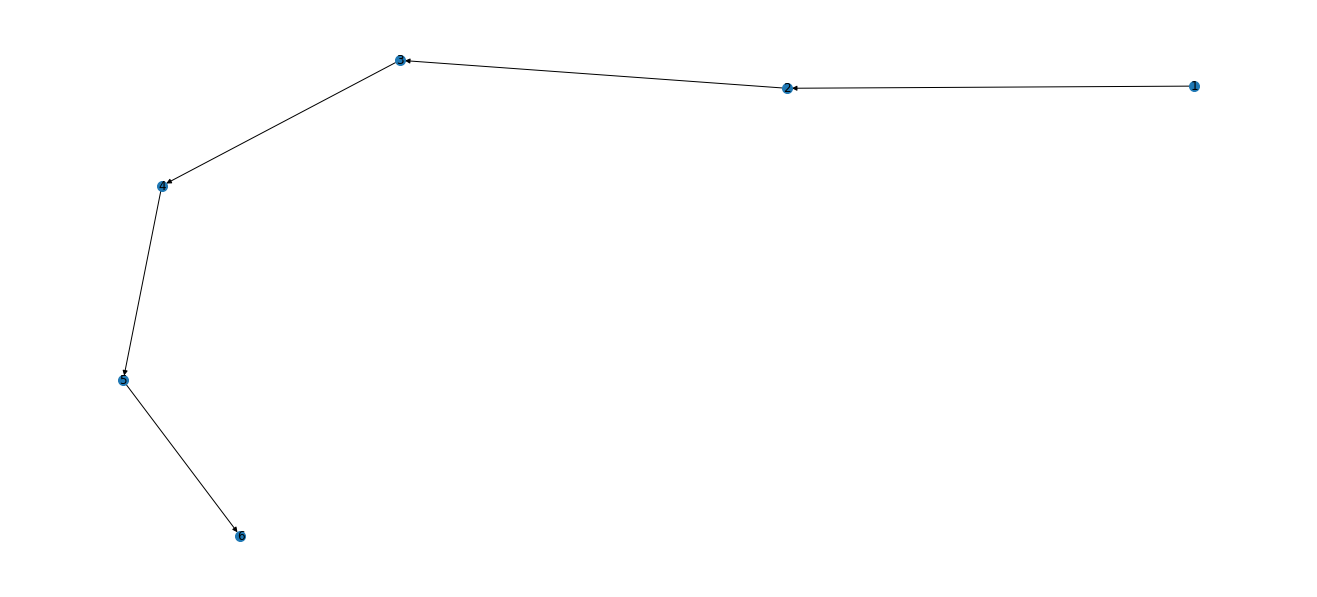

In [69]:
A=nx.DiGraph()
A.add_nodes_from([1,2,3,4,5,6])
A.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,6)])
figure(figsize=(18, 8))
nx.draw(A, with_labels=True, node_size=100)

In [70]:
df_A=PR(A,10,0.15)
df_A

,n_article,incoming,outgoing,PRt0,PRt1,PageRank
0,1,[],[2],0.025000,0,1
1,2,[1],[3],0.046250,0,2
2,3,[2],[4],0.064312,0,3
3,4,[3],[5],0.079666,0,4
4,5,[4],[6],0.092716,0,5
5,6,[5],[],0.103808,0,6


In [71]:
df_A['PRt0'].sum()

0.4117523203124999

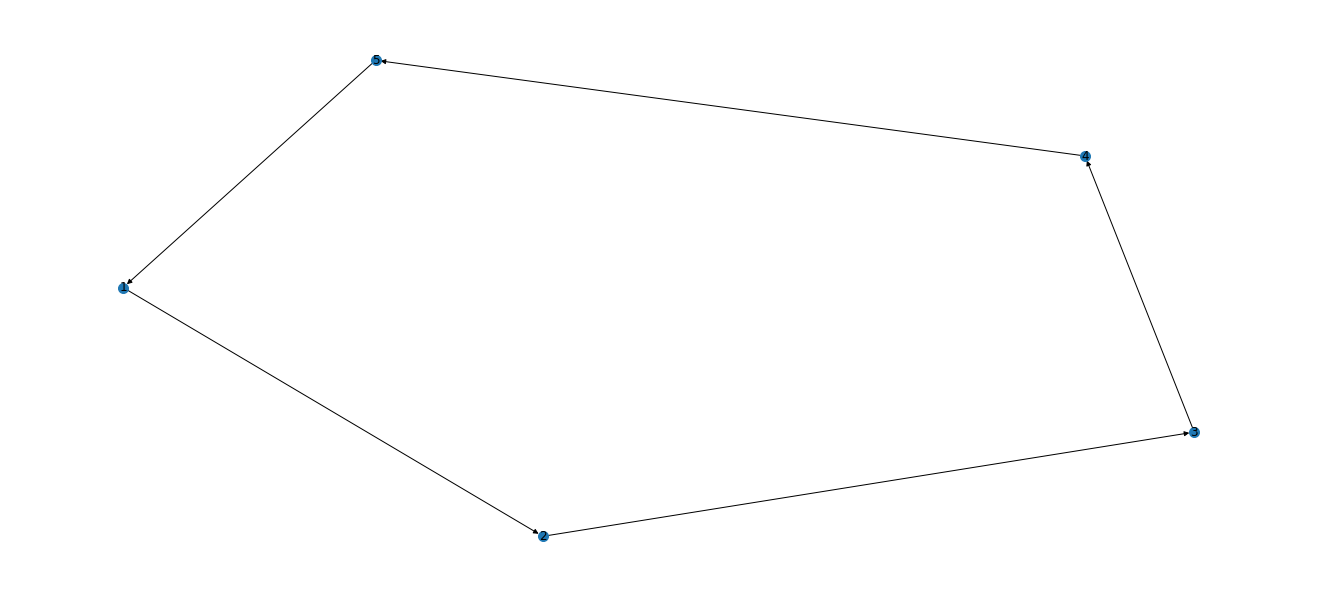

In [72]:
B=nx.DiGraph()
B.add_nodes_from([1,2,3,4,5])
B.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,1)])
figure(figsize=(18, 8))
nx.draw(B, with_labels=True, node_size=100)